<a href="https://colab.research.google.com/github/Anamika-sasankan/assignment-on-pandas/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score

In [2]:
wine_data = pd.read_csv('/content/Wine_clust.csv')

In [3]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data)

In [6]:
kmeans_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_scores.append(score)

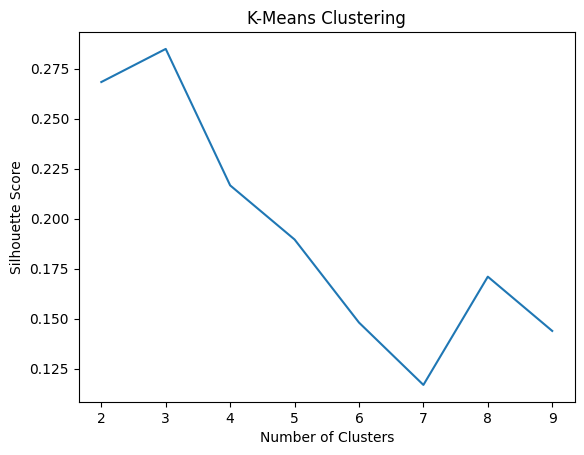

In [7]:
plt.plot(range(2, 10), kmeans_scores)
plt.title('K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [8]:
optimum_k = kmeans_scores.index(max(kmeans_scores)) + 2
print('Optimum number of clusters for K-Means:', optimum_k)

Optimum number of clusters for K-Means: 3


In [9]:
kmeans_optimum = KMeans(n_clusters=optimum_k)
kmeans_optimum.fit(X_scaled)

KMeans(n_clusters=3)

In [11]:
from sklearn.cluster import AgglomerativeClustering
hclust_scores = []
for k in range(2, 10):
    hclust = AgglomerativeClustering(n_clusters=k)
    hclust.fit(X_scaled)
    score = silhouette_score(X_scaled,hclust.labels_)
    hclust_scores.append(score)


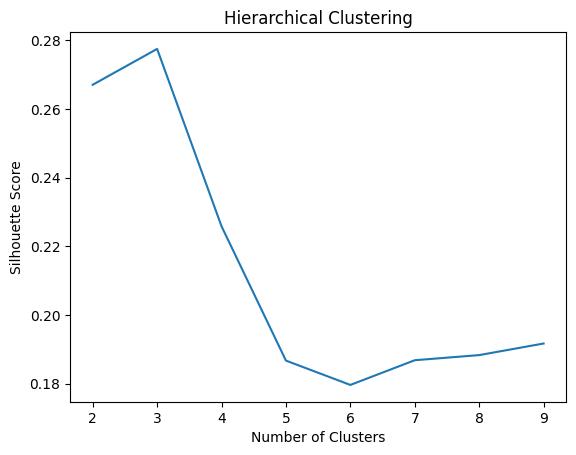

In [12]:
plt.plot(range(2, 10), hclust_scores)
plt.title('Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
optimum_k_hclust = hclust_scores.index(max(hclust_scores)) + 2
print('Optimum number of clusters for Hierarchical Clustering:', optimum_k_hclust)


Optimum number of clusters for Hierarchical Clustering: 3


In [14]:
hclust_optimum = AgglomerativeClustering(n_clusters=optimum_k_hclust)
hclust_optimum.fit(X_scaled)

AgglomerativeClustering(n_clusters=3)

In [45]:
dbscan_scores = []
eps_values = np.arange(0.1, 1.1, 0.1)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_scaled)
    labels = dbscan.labels_
    # Handle noise labels
    if -1 in labels:
        score = np.nan
    else:
        score = silhouette_score(X_scaled, labels)
    dbscan_scores.append(score)

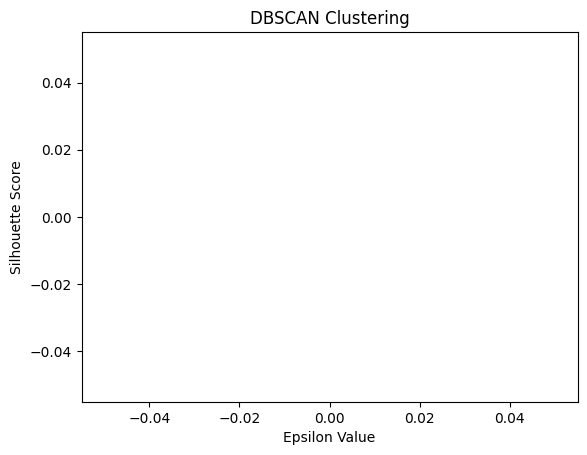

In [46]:
plt.plot(eps_values, dbscan_scores)
plt.title('DBSCAN Clustering')
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Score')
plt.show()

In [48]:
optimum_eps = eps_values[dbscan_scores.index(max(dbscan_scores))]
print('Optimum epsilon value for DBSCAN:', optimum_eps)

dbscan_optimum = DBSCAN(eps=optimum_eps, min_samples=5)
dbscan_optimum.fit(X_scaled)


Optimum epsilon value for DBSCAN: 0.1


DBSCAN(eps=0.1)

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


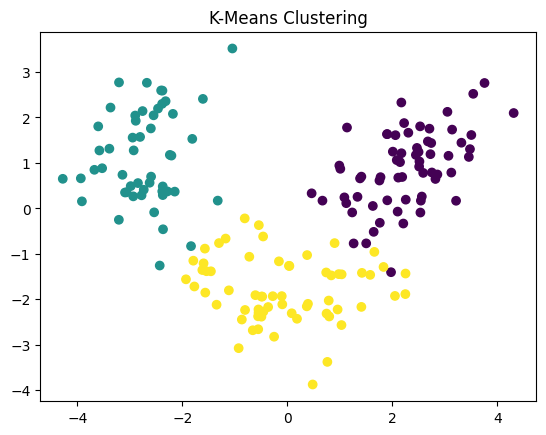

In [50]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimum.labels_)
plt.title('K-Means Clustering')
plt.show()

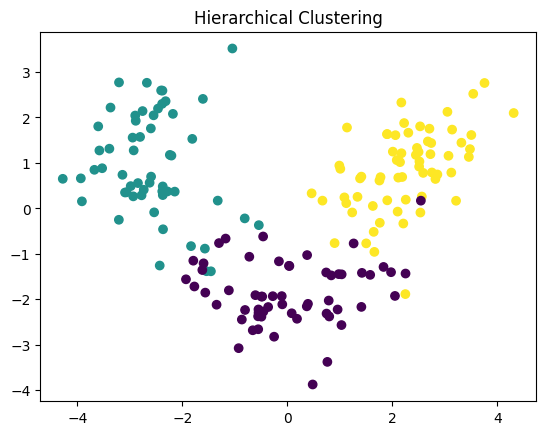

In [51]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hclust_optimum.labels_)
plt.title('Hierarchical Clustering')
plt.show()


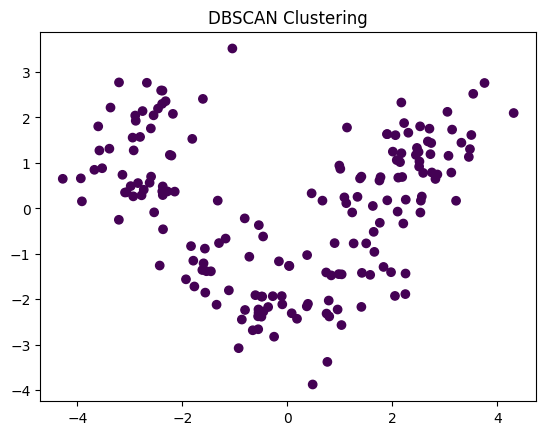

In [52]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_optimum.labels_)
plt.title('DBSCAN Clustering')
plt.show()
